In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.model_selection import train_test_split

### Import datasets

In [17]:
april = pd.read_excel("files/wind_series/april_92.xls", header=None, names=['A'])
april = pd.DataFrame(april)
may = pd.read_excel("files/wind_series/may_92.xls", header=None, names=['M'])
may = pd.DataFrame(may)

### Define Lags

In [41]:
lag = [1, 2, 3, 4, 5, 25, 200]

### Build the train lagged matrix of inputs

### Build test and validation lagged matrix

In [42]:
lag_april = april.iloc[200:4320].reset_index(drop=True)
lag_may_val = may.iloc[200:2500].reset_index(drop=True)
lag_may_tst = may.iloc[2501:4460].reset_index(drop=True)

#lag matrix
for i in lag:
    lag_april = pd.concat([lag_april, april.iloc[200-i:4320-i].reset_index(drop=True)], axis=1)                          
    lag_may_val = pd.concat([lag_may_val, may.iloc[200-i:2500-i].reset_index(drop=True)], axis=1)
    lag_may_tst = pd.concat([lag_may_tst, may.iloc[2501-i:4460-i].reset_index(drop=True)], axis=1)

lag_april.columns=['A','A-1','A-2','A-3','A-4','A-5','A-25','A-200'] 
lag_may_val.columns=['A','A-1','A-2','A-3','A-4','A-5','A-25','A-200']
lag_may_tst.columns=['A','A-1','A-2','A-3','A-4','A-5','A-25','A-200']

#dataset
X_train = lag_april
X_val = lag_may_val
X_test = lag_may_tst

Y_train = april.iloc[200:4320]
Y_val = may.iloc[200:2500]
Y_test = may.iloc[2501:4460]

### Verify correlationship of the matrix

In [45]:
corr_coef = np.corrcoef(lag_april, lag_april)[0][:7]
corr_coef

array([1.        , 0.96374947, 0.89844131, 0.90279273, 0.91375579,
       0.8582129 , 0.88860148])

#### Normalize Datasets

In [46]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

Y_train = scaler.fit_transform(Y_train).flatten()
Y_val = scaler.fit_transform(Y_val).flatten()
Y_test = scaler.fit_transform(Y_test).flatten()

### Building Network

#### Train

In [47]:
regr  = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train)

##### Predict test data

In [48]:
pred = regr.predict(X_test)

Text(0.5, 0, 'Data Sample')

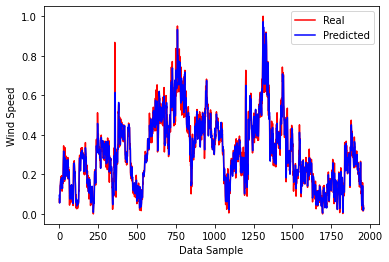

In [49]:
plt.plot(np.arange(1959),Y_test.flatten(), 'r',label='Real')
plt.plot(np.arange(1959),pred.flatten(), 'b',label='Predicted')
plt.legend()
plt.ylabel("Wind Speed")
plt.xlabel("Data Sample")

In [50]:
##### Predict validation data

In [51]:
pred_val = regr.predict(X_val)
len(pred)

1959

Text(0.5, 0, 'Data Sample')

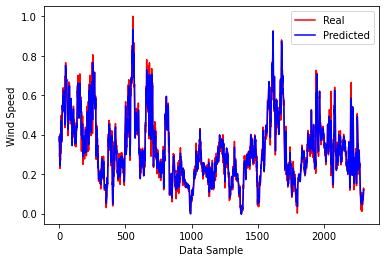

In [52]:
plt.plot(np.arange(2300),Y_val.flatten(), 'r',label='Real')
plt.plot(np.arange(2300),pred_val.flatten(), 'b',label='Predicted')
plt.legend()
plt.ylabel("Wind Speed")
plt.xlabel("Data Sample")